In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/NFLPlaybyPlay.csv")
df.head()

C:\Users\ttank\AppData\Local\Temp\ipykernel_11304\1286217426.py:1: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/NFLPlaybyPlay.csv")


,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [3]:
df.describe()

,GameID,Drive,qtr,down,TimeUnder,TimeSecs,PlayTimeDiff,yrdln,yrdline100,ydstogo,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
count,3.624470e+05,362447.000000,362447.000000,308229.000000,362447.000000,362259.000000,362073.000000,361724.000000,361724.000000,362447.000000,...,141713.000000,340504.000000,340504.000000,339087.000000,339087.000000,340454.000000,357630.000000,141709.000000,141491.000000,362447.000000
mean,2.012664e+09,12.347088,2.578231,2.001226,7.386076,1695.234346,20.574649,28.413542,48.616807,7.305236,...,-0.386522,0.533889,0.466561,0.534217,0.466185,0.501311,0.002163,0.015209,-0.010492,2012.522071
std,2.292258e+06,7.168173,1.130259,1.006003,4.642132,1063.065717,18.030486,13.002355,25.161965,4.863445,...,1.972964,0.286415,0.286468,0.288647,0.288694,0.288207,0.045326,0.056422,0.067972,2.290084
min,2.009091e+09,1.000000,1.000000,1.000000,0.000000,-900.000000,0.000000,1.000000,1.000000,0.000000,...,-14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.997214,-0.999881,-0.986673,2009.000000
25%,2.011091e+09,6.000000,2.000000,1.000000,3.000000,778.000000,5.000000,20.000000,30.000000,3.000000,...,-0.964562,0.323129,0.230595,0.319464,0.226867,0.274964,-0.014589,-0.011355,-0.018623,2011.000000
50%,2.013091e+09,12.000000,3.000000,2.000000,7.000000,1800.000000,17.000000,30.000000,49.000000,9.000000,...,0.000000,0.531286,0.469040,0.533689,0.466617,0.504349,0.000000,0.003557,0.000000,2013.000000
75%,2.015091e+09,18.000000,4.000000,3.000000,11.000000,2585.000000,37.000000,39.000000,70.000000,10.000000,...,0.484913,0.770011,0.677566,0.773729,0.681018,0.726995,0.014800,0.035702,0.011371,2015.000000
max,2.017010e+09,35.000000,5.000000,4.000000,15.000000,3600.000000,943.000000,50.000000,99.000000,50.000000,...,9.559834,1.000000,1.000000,1.000000,1.000000,1.000000,0.994848,0.994848,1.000000,2016.000000


In [4]:
df.isna().sum()

Date             0
GameID           0
Drive            0
qtr              0
down         54218
             ...  
Win_Prob     21993
WPA           4817
airWPA      220738
yacWPA      220956
Season           0
Length: 102, dtype: int64

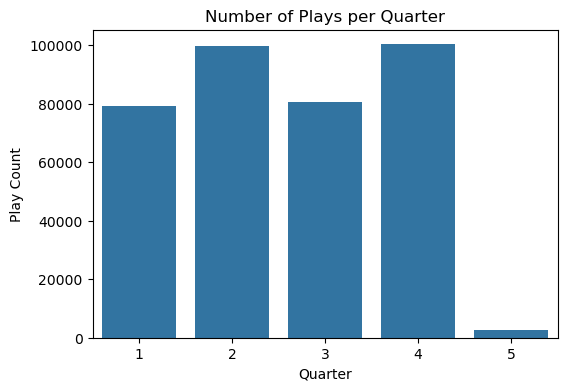

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(x='qtr', data=df)
plt.title("Number of Plays per Quarter")
plt.xlabel("Quarter")
plt.ylabel("Play Count")
plt.show()


In [6]:
games_df = (df.groupby(['GameID', 'posteam',], as_index=False)
              .agg({
                  
                  'InterceptionThrown': 'sum',
                  'Fumble': 'sum',
                  'Touchdown': 'sum',
                  'FieldGoalResult': lambda x: (x == 'Good').sum(),
                  'Penalty.Yards': 'sum',
                  'Yards.Gained': 'sum',
                  'ReturnResult': lambda x: (x == 'Touchdown').sum(),
                  'Sack': 'sum',
                  'PosTeamScore': 'max',
                  'DefTeamScore': 'max',
              }))

games_df['win'] = (games_df['PosTeamScore'] > games_df['DefTeamScore']).astype(int)

games_df.head(100)

  

,GameID,posteam,InterceptionThrown,Fumble,Touchdown,FieldGoalResult,Penalty.Yards,Yards.Gained,ReturnResult,Sack,PosTeamScore,DefTeamScore,win
0,2009091000,PIT,2,2,1,2,35,476,0,4,10.0,10.0,0
1,2009091000,TEN,1,1,1,1,53,425,0,1,10.0,10.0,0
2,2009091300,ATL,0,0,2,2,32,312,0,2,19.0,7.0,1
3,2009091300,MIA,1,3,1,0,30,413,0,4,6.0,19.0,0
4,2009091301,BAL,1,1,6,1,34,600,1,1,37.0,23.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2009092800,DAL,0,0,2,2,90,497,0,2,19.0,7.0,1
96,2009100400,CHI,0,2,6,3,1,400,1,2,47.0,24.0,1
97,2009100400,DET,1,1,3,2,86,631,0,5,24.0,48.0,0
98,2009100401,CIN,1,2,2,1,65,626,0,2,19.0,20.0,0


C:\Users\ttank\AppData\Local\Temp\ipykernel_11304\932916650.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sacks_win, x='Sack', y='win', palette='viridis')


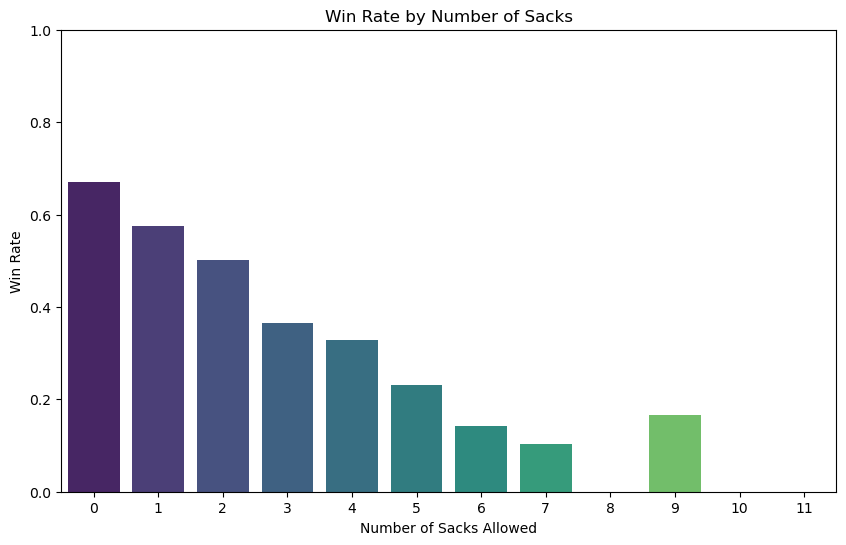

In [7]:
sacks_win = games_df.groupby('Sack', as_index=False)['win'].mean()  # mean gives win rate

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=sacks_win, x='Sack', y='win', palette='viridis')
plt.xlabel('Number of Sacks Allowed')
plt.ylabel('Win Rate')
plt.title('Win Rate by Number of Sacks')
plt.ylim(0,1)
plt.show()

In [8]:
games_df.to_csv("../data/nfl_cleaned.csv", index=False)
print("✅ Cleaned data saved to data/nfl_cleaned.csv")

✅ Cleaned data saved to data/nfl_cleaned.csv


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load cleaned data
df = pd.read_csv("../data/nfl_cleaned.csv")

# Feature setup
df['target'] = (df['win'] > 0).astype(int)
df = pd.get_dummies(df, columns=['posteam'], drop_first=True)

X = df.drop(columns=['target', 'win', 'PosTeamScore', 'DefTeamScore', 'GameID'])
y = df['target']

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Evaluate
acc = accuracy_score(y_test, model.predict(X_test))
print(f"Model Accuracy: {acc:.3f}")


Model Accuracy: 0.717


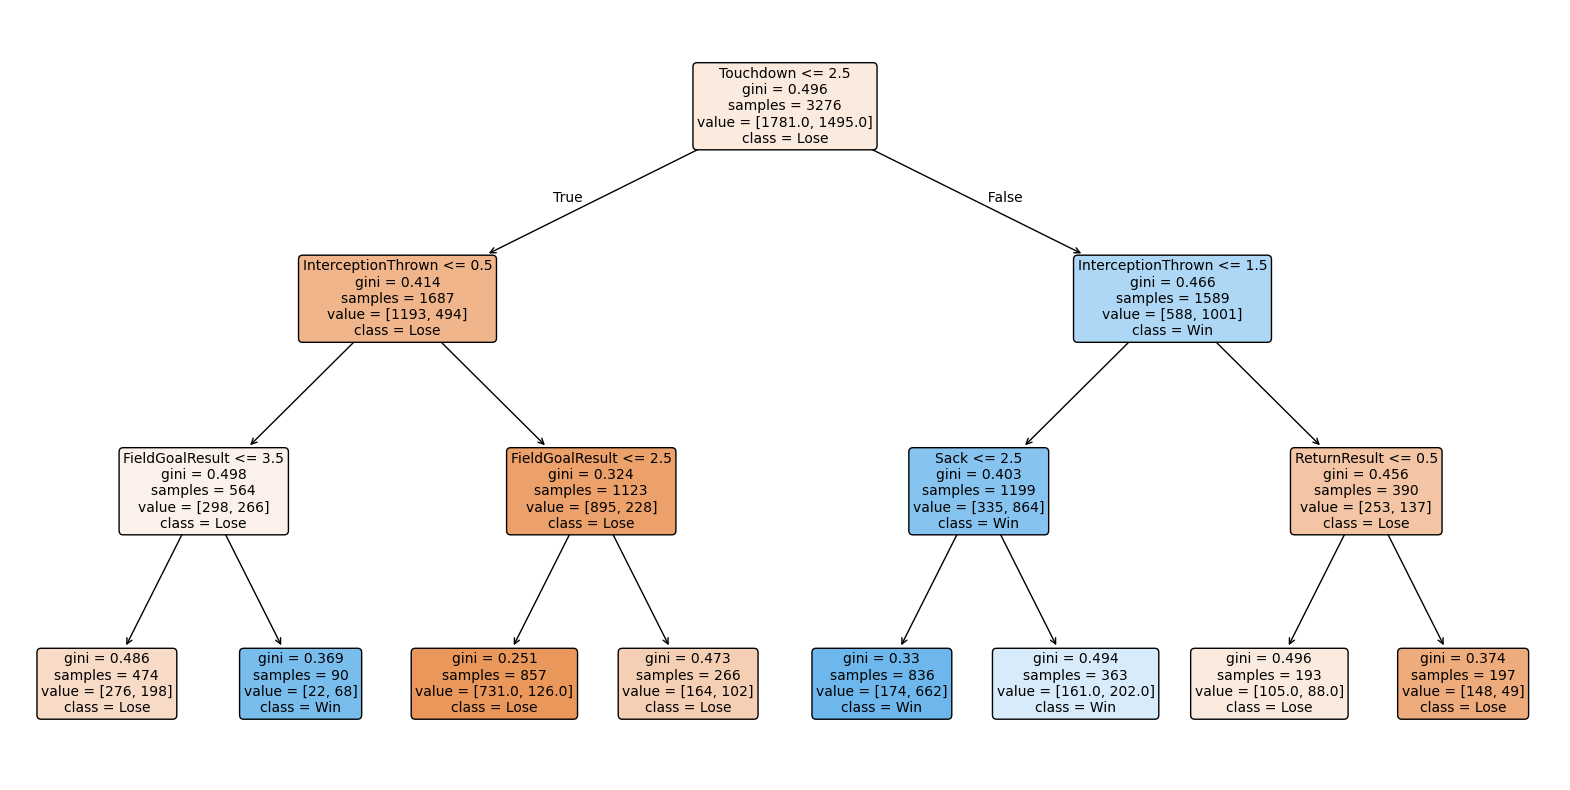

In [18]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))  # Adjust the size as needed
plot_tree(
    model,
    feature_names=X.columns,
    class_names=['Lose', 'Win'],
    filled=True,             # Colors nodes by class
    rounded=True,
    fontsize=10
)
plt.show()
